# Pellets Permutations 

In [11]:
# CREATE CSV FILE WITH ALL COMBINATIONS OF POROSITY

import numpy as np
import pandas as pd
from itertools import permutations

column_header = np.array(['pellet_1','pellet_2','pellet_3','pellet_4']) 

0.017565378
0.028869223
0.02931531
0.028570524

# smeared_porosities = [0.009711213, 0.018966845, 0.016667445, 0.016136852]
smeared_porosities = [0.017565378, 0.028869223, 0.02931531, 0.028570524]

average = np.sum(smeared_porosities)/4
print(average)
parameter_study = list(permutations(smeared_porosities))  
parameter_matrix = pd.DataFrame(parameter_study,columns=column_header)
print(parameter_matrix)
parameter_matrix.to_csv(path_or_buf='permutations.csv',index=False)

0.02608010875
    pellet_1  pellet_2  pellet_3  pellet_4
0   0.017565  0.028869  0.029315  0.028571
1   0.017565  0.028869  0.028571  0.029315
2   0.017565  0.029315  0.028869  0.028571
3   0.017565  0.029315  0.028571  0.028869
4   0.017565  0.028571  0.028869  0.029315
5   0.017565  0.028571  0.029315  0.028869
6   0.028869  0.017565  0.029315  0.028571
7   0.028869  0.017565  0.028571  0.029315
8   0.028869  0.029315  0.017565  0.028571
9   0.028869  0.029315  0.028571  0.017565
10  0.028869  0.028571  0.017565  0.029315
11  0.028869  0.028571  0.029315  0.017565
12  0.029315  0.017565  0.028869  0.028571
13  0.029315  0.017565  0.028571  0.028869
14  0.029315  0.028869  0.017565  0.028571
15  0.029315  0.028869  0.028571  0.017565
16  0.029315  0.028571  0.017565  0.028869
17  0.029315  0.028571  0.028869  0.017565
18  0.028571  0.017565  0.028869  0.029315
19  0.028571  0.017565  0.029315  0.028869
20  0.028571  0.028869  0.017565  0.029315
21  0.028571  0.028869  0.029315  0.0175

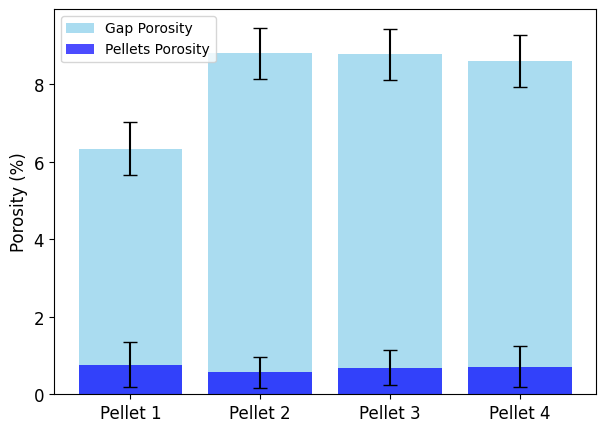

In [12]:
# PLOT THE POROSITY OF CT4

import matplotlib.pyplot as ax1

# Values of porosity for 4 different pellets
porosity_pellets = [0.007680510586470*100, 0.005703363513639*100, 0.006830263038341*100, 0.007084581965867*100]
porosity_gap = [0.063450245065991*100, 0.088035082560691*100, 0.087800356246220*100, 0.086056465122299*100]

# Error values for pellets porosity
error_pellets = [0.005873077*100, 0.003959483*100, 0.004530747*100, 0.005288161*100]

# Error values for gap porosity
error_gap = [0.006758431*100, 0.006633707*100, 0.006634294*100, 0.006630262*100]

# Labels for the pellets
pellet_labels = ['Pellet 1', 'Pellet 2', 'Pellet 3', 'Pellet 4']

# Create a vertical bar chart with swapped axes
ax1.figure(figsize=(7, 5))

# Plot the Gap Porosity with error bars
ax1.bar(pellet_labels, porosity_gap, yerr=error_gap, color='skyblue', label='Gap Porosity', alpha=0.7, capsize=5)

# Plot the Pellets Porosity with error bars
ax1.bar(pellet_labels, porosity_pellets, yerr=error_pellets, color='blue', label='Pellets Porosity', alpha=0.7, capsize=5)

ax1.ylabel('Porosity (%)', fontsize=12)
ax1.xticks(fontsize=12)
ax1.yticks(fontsize=12)

# Add a legend
ax1.legend(fontsize=10)


In [13]:
# CONVERT THE JSON FILE INTO A DATAFRAME

import json
import pandas as pd
import matplotlib.pyplot as ax1
import numpy as np 

path = 'stochastic_tools_out.json'

# to open the JSON file in read mode, assign it to the variable file and convert into a pyhton data structure (dictionary)
with open(path, 'r') as file: 
  data_json = json.load(file)


# to extract the samples dictionary from data_json and convert it into a DataFrame
data_label = data_json['time_steps'][-1]['samples'] 
parameters_study = pd.DataFrame(data_label)
parameters_study.columns = ['pellet_1','pellet_2','pellet_3','pellet_4']


raw_data = data_json['time_steps'][-1]['results']
df = pd.DataFrame(raw_data)
df.columns = ['inlet-p', 'outlet-p','time','converged']

# n = range(0,int(df.shape[0]))
# data_columns = df.shape[1]

p_in = df['inlet-p'][:].tolist()
t = df['time'][:].tolist()


# The first element of the list t is selected and ordered vertically
t_header = np.stack(t[0],axis=0)
# A DataFrame is created, composed by all the inlet pressure values at each time-step 
md_df = pd.DataFrame(data = p_in, columns = t_header)
md_df = md_df.T

print('Modeling Results')
md_df *= 1e-6

md_df


Modeling Results


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0.0,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
1.0,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,...,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980,7.002980
2.0,6.842150,6.839718,6.842957,6.841977,6.839114,6.840567,6.904127,6.902352,6.919467,6.942210,...,6.919931,6.942653,6.919441,6.942674,6.901654,6.902714,6.917929,6.941946,6.918645,6.941917
3.0,6.511421,6.504925,6.513681,6.511051,6.503244,6.507112,6.692497,6.687772,6.744105,6.812309,...,6.745372,6.813473,6.743968,6.813461,6.685772,6.688586,6.739751,6.811443,6.741791,6.811465
4.0,6.094244,6.083464,6.098076,6.093689,6.080626,6.087022,6.412243,6.404477,6.514720,6.642913,...,6.516836,6.644742,6.514370,6.644607,6.401005,6.405616,6.507169,6.641270,6.510733,6.641469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996.0,0.107815,0.107795,0.107828,0.107824,0.107808,0.107798,0.111433,0.111428,0.113545,0.115144,...,0.113594,0.115176,0.113563,0.115145,0.111402,0.111391,0.113464,0.115068,0.113495,0.115099
2997.0,0.107815,0.107795,0.107828,0.107824,0.107808,0.107798,0.111433,0.111428,0.113545,0.115144,...,0.113594,0.115176,0.113563,0.115145,0.111402,0.111391,0.113464,0.115068,0.113495,0.115099
2998.0,0.107815,0.107795,0.107828,0.107824,0.107808,0.107798,0.111433,0.111428,0.113545,0.115144,...,0.113594,0.115176,0.113563,0.115145,0.111402,0.111391,0.113464,0.115068,0.113495,0.115099
2999.0,0.107815,0.107795,0.107828,0.107824,0.107808,0.107798,0.111433,0.111428,0.113545,0.115144,...,0.113594,0.115176,0.113563,0.115145,0.111402,0.111391,0.113464,0.115068,0.113495,0.115099


In [14]:
# FIND THE TIME-SCALE FOR PLENUM DEPRESSURIZATION

desired_value = 0.15

for column_name in md_df.columns:
    index = md_df[md_df[column_name] < desired_value].index.min()
    print(index)




448.0
443.0
451.0
448.0
441.0
444.0
749.0
746.0
1091.0
1522.0
1080.0
1515.0
755.0
754.0
1094.0
1524.0
1089.0
1521.0
742.0
743.0
1078.0
1513.0
1084.0
1517.0


In [15]:
# Create a function class to determine the grouping of process parameters

class param_grouping:
    def __init__(self,tag,data):
        self.tag = tag
        self.data = data
        self.values = [] # unique values of parameters groups
        self.idx = [] # indices of each grouping
        
        #Calculate values 
        self.values = self.data[self.tag].unique() #unique values for this group
        #Find the group indicies
        if (self.values.shape[-1]) == 1:
            self.idx = list(self.data.index)
        else:
            for i in range(self.values.shape[-1]):
                group = self.data.groupby(self.tag).get_group(self.values[i])
                self.idx.append(list(group.index))

pel_1 = param_grouping('pellet_1',parameters_study)
pel_2 = param_grouping('pellet_2',parameters_study)
pel_3 = param_grouping('pellet_3',parameters_study)
pel_4 = param_grouping('pellet_4',parameters_study)

# print('Possible values of pellet 1 can assume = ', pel_1.values)
# print('The indices of pellet values = ', pel_1.idx)

# index values
# 0 = 4.59381e-10
# 1 = 3.77934e-10
# 2 = 3.07829e-10
# 3 = 2.47962e-10


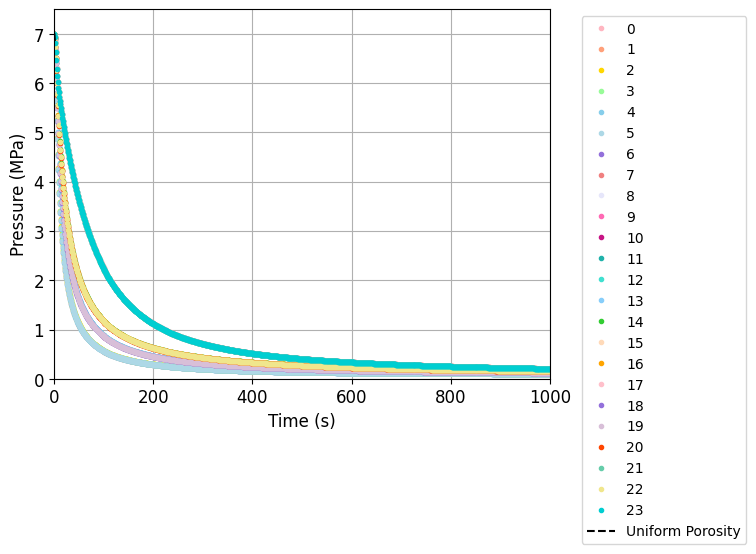

In [16]:

import matplotlib.pyplot as plt

uniform = pd.read_csv('model_pellets_out.csv')


import matplotlib.pyplot as plt

python_colors = [
    "#FFB6C1",  # Light Pink
    "#FFA07A",  # Light Salmon
    "#FFD700",  # Gold
    "#98FB98",  # Pale Green
    "#87CEEB",  # Sky Blue
    "#ADD8E6",  # Light Blue
    "#9370DB",  # Medium Purple
    "#F08080",  # Light Coral
    "#E6E6FA",  # Lavender
    "#FF69B4",  # Hot Pink
    "#C71585",  # Medium Violet Red
    "#20B2AA",  # Light Sea Green
    "#40E0D0",  # Turquoise
    "#87CEFA",  # Light Sky Blue
    "#32CD32",  # Lime Green
    "#FFDAB9",  # Peachpuff
    "#FFA500",  # Orange
    "#FFC0CB",  # Pink
    "#9370DB",  # Medium Purple
    "#D8BFD8",  # Thistle
    "#FF4500",  # Orange Red
    "#66CDAA",  # Medium Aquamarine
    "#F0E68C",  # Khaki
    "#00CED1",  # Dark Turquoise
]


# Create a colormap with your colors
cmap = plt.cm.colors.ListedColormap(python_colors)



ax = md_df.plot(colormap=cmap, label = None, marker = '.', linestyle = '')
plt.plot(uniform ['time'], uniform['inlet-p']/1e6, label = 'Uniform Porosity', color = 'k', linestyle = '--')
ax.tick_params(axis='both', labelsize=12)  
plt.xlabel('Time (s)', fontsize = 12)
plt.ylabel('Pressure (MPa)', fontsize = 12)
plt.grid()
plt.xlim(0, 1000)
plt.ylim(0, 7.5)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

# md_df.loc[:,pel_1.idx[0]].plot() 
# plt.xlabel('time(s)')
# plt.ylabel('inlet pressure (Pa)')
# plt.grid()
# plt.xlim(0, 200)
# md_df.loc[:,pel_2.idx[3]].plot()
# plt.xlabel('time(s)')
# plt.ylabel('inlet pressure (Pa)')
# plt.grid()
# plt.xlim(0, 200)
# md_df.loc[:,pel_3.idx[3]].plot()
# plt.xlabel('time(s)')
# plt.ylabel('inlet pressure (Pa)')
# plt.grid()
# plt.xlim(0, 200)
# md_df.loc[:,pel_4.idx[3]].plot()
# plt.xlabel('time(s)')
# plt.ylabel('inlet pressure (Pa)')
# plt.grid()
# plt.xlim(0, 200)

# # print(parameter_matrix)


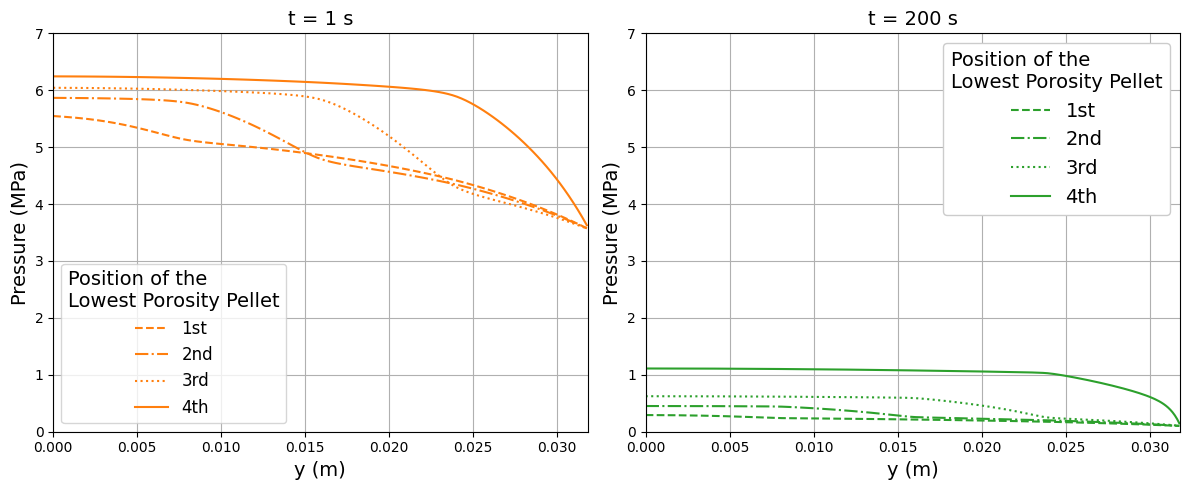

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 



data_1_10 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0001.csv')
data_2_10 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0001.csv')
data_3_10 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0001.csv')
data_4_10 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0001.csv')

# data_1_20 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0002.csv')
# data_2_20 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0002.csv')
# data_3_20 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0002.csv')
# data_4_20 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0002.csv')

data_1_20 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0200.csv')
data_2_20 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0200.csv')
data_3_20 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0200.csv')
data_4_20 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0200.csv')

data_1_30 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0003.csv')
data_2_30 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0003.csv')
data_3_30 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0003.csv')
data_4_30 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0003.csv')

data_1_40 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0004.csv')
data_2_40 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0004.csv')
data_3_40 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0004.csv')
data_4_40 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0004.csv')


fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
ax1.plot(data_1_10['y'], data_1_10['pressure']/1e6, color = 'C1', linestyle = '--', label = '1st')
ax1.plot(data_2_10['y'], data_2_10['pressure']/1e6, color = 'C1', linestyle = '-.', label = '2nd')
ax1.plot(data_3_10['y'], data_3_10['pressure']/1e6, color = 'C1', linestyle = ':', label = '3rd')
ax1.plot(data_4_10['y'], data_4_10['pressure']/1e6, color = 'C1', linestyle = '-', label = '4th')
ax1.set_ylabel('Pressure (MPa)', fontsize = 14)
ax1.grid()
ax1.set_xlabel('y (m)', fontsize = 14)
ax1.set_ylim(0, 7)
ax1.set_xlim(0, 0.0318)
ax1.set_title('t = 1 s', fontsize = 14)
ax1.legend(title = 'Position of the\nLowest Porosity Pellet', fontsize = 12, title_fontsize = 14)

ax2 = fig.add_subplot(122)
ax2.plot(data_1_20['y'], data_1_20['pressure']/1e6, color = 'C2', linestyle = '--', label = '1st')
ax2.plot(data_2_20['y'], data_2_20['pressure']/1e6, color = 'C2', linestyle = '-.', label = '2nd')
ax2.plot(data_3_20['y'], data_3_20['pressure']/1e6, color = 'C2', linestyle = ':', label = '3rd')
ax2.plot(data_4_20['y'], data_4_20['pressure']/1e6, color = 'C2', linestyle = '-', label = '4th')
ax2.set_xlabel('y (m)', fontsize = 14)
ax2.set_ylabel('Pressure (MPa)', fontsize = 14)
ax2.grid()
ax2.set_ylim(0, 7)
ax2.set_xlim(0, 0.0318)
ax2.set_title('t = 200 s', fontsize = 14)
ax2.legend(title = 'Position of the\nLowest Porosity Pellet', fontsize = 14, title_fontsize = 14, framealpha = 1.0)

# Reduce the tick font size for all subplots
# tick_fontsize = 14  # Adjust the font size as needed (make it smaller)
# for ax in [ax1, ax2]:
#     ax.tick_params(axis='both', labelsize=tick_fontsize)

# ax3 = fig.add_subplot(133)
# ax3.plot(data_1_30['y'], data_1_30['pressure']/1e6, color = 'C3', linestyle = '--', label = '1st')
# ax3.plot(data_2_30['y'], data_2_30['pressure']/1e6, color = 'C3', linestyle = '-.', label = '2nd')
# ax3.plot(data_3_30['y'], data_3_30['pressure']/1e6, color = 'C3', linestyle = ':', label = '3rd')
# ax3.plot(data_4_30['y'], data_4_30['pressure']/1e6, color = 'C3', linestyle = '-', label = '4th')
# ax3.grid()
# ax3.set_ylabel('Pressure (MPa)', fontsize = 14)
# ax3.set_xlabel('y (m)', fontsize = 14)
# ax3.set_ylim(0, 5)
# ax3.set_xlim(0, 0.0318)
# ax3.set_title('t = 30 s', fontsize = 14)
# ax3.legend(title = 'Lowest Porosity Pellet')


# ax4 = fig.add_subplot(144)
# ax4.plot(data_1_40['y'], data_1_40['pressure']/1e6, color = 'C4', linestyle = '--', label = '1st')
# ax4.plot(data_2_40['y'], data_2_40['pressure']/1e6, color = 'C4', linestyle = '-.', label = '2nd')
# ax4.plot(data_3_40['y'], data_3_40['pressure']/1e6, color = 'C4', linestyle = ':', label = '3rd')
# ax4.plot(data_4_40['y'], data_4_40['pressure']/1e6, color = 'C4', linestyle = '-', label = '4th')
# ax4.grid()
# ax4.set_ylabel('Pressure (MPa)', fontsize = 13)
# ax4.set_xlabel('y (m)', fontsize = 12)
# ax4.set_ylim(0, 5)
# ax4.set_xlim(0, 0.032)
# ax4.set_title('t = 40 s', fontsize = 12)
# ax4.legend(title = 'Lowest Porosity Pellet')

plt.tight_layout()




# plt.legend(title = 'Time-Step')



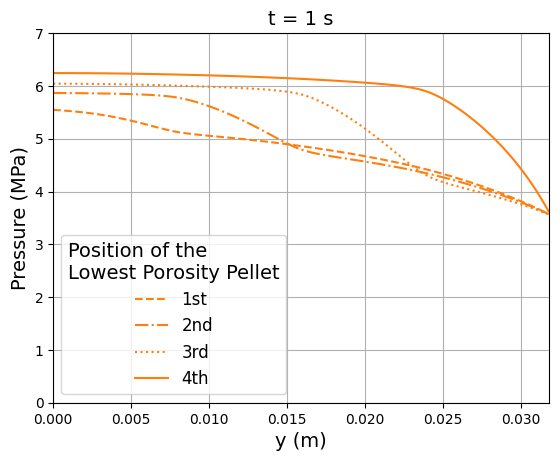

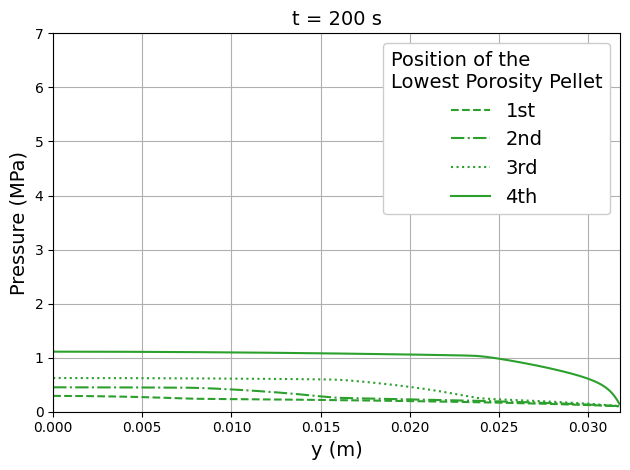

In [19]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 



data_1_10 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0001.csv')
data_2_10 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0001.csv')
data_3_10 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0001.csv')
data_4_10 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0001.csv')

# data_1_20 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0002.csv')
# data_2_20 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0002.csv')
# data_3_20 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0002.csv')
# data_4_20 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0002.csv')

data_1_20 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0200.csv')
data_2_20 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0200.csv')
data_3_20 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0200.csv')
data_4_20 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0200.csv')

data_1_30 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0003.csv')
data_2_30 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0003.csv')
data_3_30 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0003.csv')
data_4_30 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0003.csv')

data_1_40 = pd.read_csv('model_pellets_1_csv_pressure_distribution_0004.csv')
data_2_40 = pd.read_csv('model_pellets_2_csv_pressure_distribution_0004.csv')
data_3_40 = pd.read_csv('model_pellets_3_csv_pressure_distribution_0004.csv')
data_4_40 = pd.read_csv('model_pellets_4_csv_pressure_distribution_0004.csv')

import matplotlib.pyplot as ax1

ax1.plot(data_1_10['y'], data_1_10['pressure']/1e6, color = 'C1', linestyle = '--', label = '1st')
ax1.plot(data_2_10['y'], data_2_10['pressure']/1e6, color = 'C1', linestyle = '-.', label = '2nd')
ax1.plot(data_3_10['y'], data_3_10['pressure']/1e6, color = 'C1', linestyle = ':', label = '3rd')
ax1.plot(data_4_10['y'], data_4_10['pressure']/1e6, color = 'C1', linestyle = '-', label = '4th')
ax1.ylabel('Pressure (MPa)', fontsize = 14)
ax1.grid()
ax1.xlabel('y (m)', fontsize = 14)
ax1.ylim(0, 7)
ax1.xlim(0, 0.0318)
# ax1.title('t = 1 s', fontsize = 14)
ax1.legend(title = 'Position of the\nLowest Porosity Pellet', fontsize = 12, title_fontsize = 14)
ax1.show()

import matplotlib.pyplot as ax2

ax2.plot(data_1_20['y'], data_1_20['pressure']/1e6, color = 'C2', linestyle = '--', label = '1st')
ax2.plot(data_2_20['y'], data_2_20['pressure']/1e6, color = 'C2', linestyle = '-.', label = '2nd')
ax2.plot(data_3_20['y'], data_3_20['pressure']/1e6, color = 'C2', linestyle = ':', label = '3rd')
ax2.plot(data_4_20['y'], data_4_20['pressure']/1e6, color = 'C2', linestyle = '-', label = '4th')
ax2.xlabel('y (m)', fontsize = 14)
ax2.ylabel('Pressure (MPa)', fontsize = 14)
ax2.grid()
ax2.ylim(0, 7)
ax2.xlim(0, 0.0318)
# ax2.title('t = 200 s', fontsize = 14)
ax2.legend(title = 'Position of the\nLowest Porosity Pellet', fontsize = 14, title_fontsize = 14, framealpha = 1.0)
ax2.plot()

# Reduce the tick font size for all subplots
# tick_fontsize = 14  # Adjust the font size as needed (make it smaller)
# for ax in [ax1, ax2]:
#     ax.tick_params(axis='both', labelsize=tick_fontsize)

# ax3 = fig.add_subplot(133)
# ax3.plot(data_1_30['y'], data_1_30['pressure']/1e6, color = 'C3', linestyle = '--', label = '1st')
# ax3.plot(data_2_30['y'], data_2_30['pressure']/1e6, color = 'C3', linestyle = '-.', label = '2nd')
# ax3.plot(data_3_30['y'], data_3_30['pressure']/1e6, color = 'C3', linestyle = ':', label = '3rd')
# ax3.plot(data_4_30['y'], data_4_30['pressure']/1e6, color = 'C3', linestyle = '-', label = '4th')
# ax3.grid()
# ax3.set_ylabel('Pressure (MPa)', fontsize = 14)
# ax3.set_xlabel('y (m)', fontsize = 14)
# ax3.set_ylim(0, 5)
# ax3.set_xlim(0, 0.0318)
# ax3.set_title('t = 30 s', fontsize = 14)
# ax3.legend(title = 'Lowest Porosity Pellet')


# ax4 = fig.add_subplot(144)
# ax4.plot(data_1_40['y'], data_1_40['pressure']/1e6, color = 'C4', linestyle = '--', label = '1st')
# ax4.plot(data_2_40['y'], data_2_40['pressure']/1e6, color = 'C4', linestyle = '-.', label = '2nd')
# ax4.plot(data_3_40['y'], data_3_40['pressure']/1e6, color = 'C4', linestyle = ':', label = '3rd')
# ax4.plot(data_4_40['y'], data_4_40['pressure']/1e6, color = 'C4', linestyle = '-', label = '4th')
# ax4.grid()
# ax4.set_ylabel('Pressure (MPa)', fontsize = 13)
# ax4.set_xlabel('y (m)', fontsize = 12)
# ax4.set_ylim(0, 5)
# ax4.set_xlim(0, 0.032)
# ax4.set_title('t = 40 s', fontsize = 12)
# ax4.legend(title = 'Lowest Porosity Pellet')

plt.tight_layout()




# plt.legend(title = 'Time-Step')

